In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork
from gympy.optimizers import GradientDescent
from gympy.loss import CategoricalCrossEntropy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.3),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = GradientDescent(learning_rate=1e-2),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.10047535],
       [0.09999534],
       [0.09978986],
       [0.09898167],
       [0.10141209],
       [0.10017982],
       [0.09990027],
       [0.10087401],
       [0.09831656],
       [0.10007503]])

In [9]:
yy = Y[:,0:1]
yy

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy()(tt, Y[:,0:1])

2.2978429042721693

0 cost 2.3039697619016923
150 cost 2.2721405850604683
300 cost 2.167728511436189
450 cost 1.9051631113688576
600 cost 1.5009293085786748
750 cost 1.0411903142821939
900 cost 0.8020843218518482
1050 cost 0.9261419278445077
1200 cost 0.6334661735089648
1350 cost 0.6915016853242302
1500 cost 0.5220499920060877
1650 cost 0.47858799151513304
1800 cost 0.35206065355041044
1950 cost 0.427513872378414
2100 cost 0.30098044322725576
2250 cost 0.2879651350770396
2400 cost 0.22557723748663672
2550 cost 0.2058458712243148
2700 cost 0.3675348207887556
2850 cost 0.22770689547401654
3000 cost 0.21339537647239373
3150 cost 0.2485402881980465
3300 cost 0.17334996505029804
3450 cost 0.1210379657196639
3600 cost 0.15137417624916194
3750 cost 0.20806197160457757
3900 cost 0.18198640193053228
4050 cost 0.20247784079193268
4200 cost 0.11446557880981884
4350 cost 0.15258551504158005
4500 cost 0.14854072147850034
4650 cost 0.11158026137080726
4800 cost 0.10410413303739631
4950 cost 0.09734023817673168


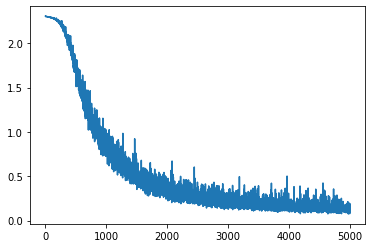

In [12]:
n_iter=2
model.train(X,Y, show=2, n_iter=n_iter)
plt.plot(np.arange(n_iter), model.cost)

In [13]:
model.forward(X[:,[453]])

array([[1.07703746e-05],
       [8.65239684e-05],
       [9.98494536e-01],
       [1.30107051e-03],
       [4.65939152e-07],
       [4.77251542e-06],
       [4.20072857e-06],
       [3.41690745e-05],
       [6.26133749e-05],
       [8.77544437e-07]])

In [14]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [15]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

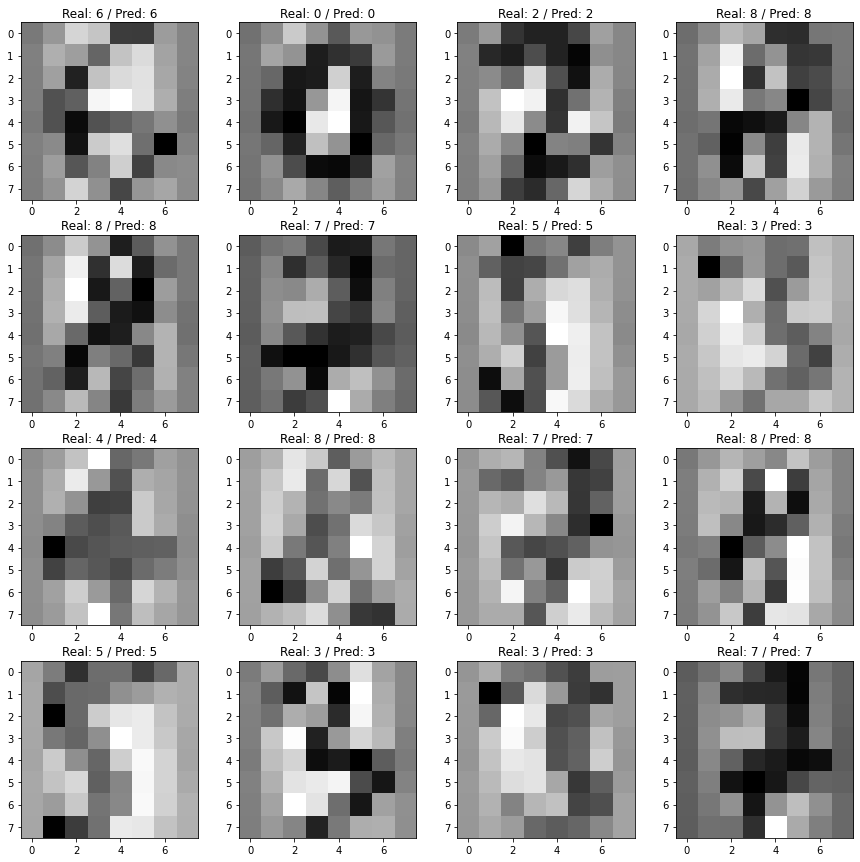

In [16]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')